## Data segmentation with K-means clustering

In the following example we'll use k-means clustering for some mall customer data. Data is from [Kaggle tutorial](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) and the goal is to understand better the customer base and group customers into groups. This information can be used for example for better targeting.

First we'll import libraries.

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sn
from matplotlib import pyplot as plt

**Pandas** is a high-performance library for exploring and cleaning the data.

**NumPy** is scientific computing library and has some helpful math functions.

**Scikit-learn** is a machine learning library and many machine learning methods are built-in in the library.

**Seaborn** is a visualization library.

Next, we'll import the data and have a quick look:

In [3]:
df=pd.read_csv('Mall_customers.csv')

In [4]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
df.shape

(200, 5)

In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Next we need to change gender attribute to be numeric. First we need to see possible values to see if it is binary attribute:

In [8]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

And then we can safely just make the column named "is_female" and set 1 if it is and 0 if it's not.

In [9]:
df['is_female']=np.where(df['Gender']=='Female', 1, 0)

In [10]:
df=df.drop('Gender', axis=1)

In [11]:
df.head(10)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),is_female
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1
5,6,22,17,76,1
6,7,35,18,6,1
7,8,23,18,94,1
8,9,64,19,3,0
9,10,30,19,72,1


Now that we have only numerical data, we can check the distributions:

In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),is_female
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,0.560000
std,57.879185,13.969007,26.264721,25.823522,0.497633
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,1.000000
max,200.000000,70.000000,137.000000,99.000000,1.000000


For clustering we don't need CustomerID, because it doesn't tell us anything. Let's drop it. 

In [13]:
df=df.drop('CustomerID', axis=1)

Now we can get down to business and select K to use. We can do it by using so called elbow method for seeing how the amount of clusters effects the variance. 

*Inetria = Sum of squared distances of samples to their closest cluster center aka variance.*

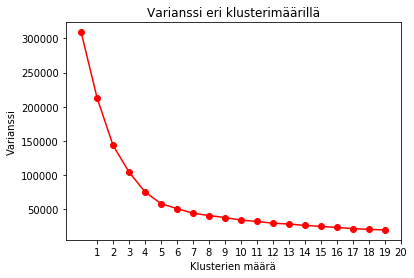

In [14]:
variances = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, max_iter=200) 
    kmeans.fit_predict(df)
    variances.append(kmeans.inertia_)
    
plt.plot(variances, 'ro-', label="Variance")
plt.xticks(range(1,21))
plt.title("Varianssi eri klusterimäärillä")
plt.xlabel("Klusterien määrä")
plt.ylabel("Varianssi")
plt.show()

Based on the picture and the fact that we don't want to divide customers into 17 clusters, let's select the number of clusters to five. Let's do the clustering again and assign the cluster the data point belongs to back to the data set.

In [17]:
kmeans = KMeans(n_clusters=5, max_iter=200) 
clusters=kmeans.fit_predict(df)
df['cluster']=clusters

Next we can visualize the outcome of the clustering.

/Users/anniinasa/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/anniinasa/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/anniinasa/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/anniinasa/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype

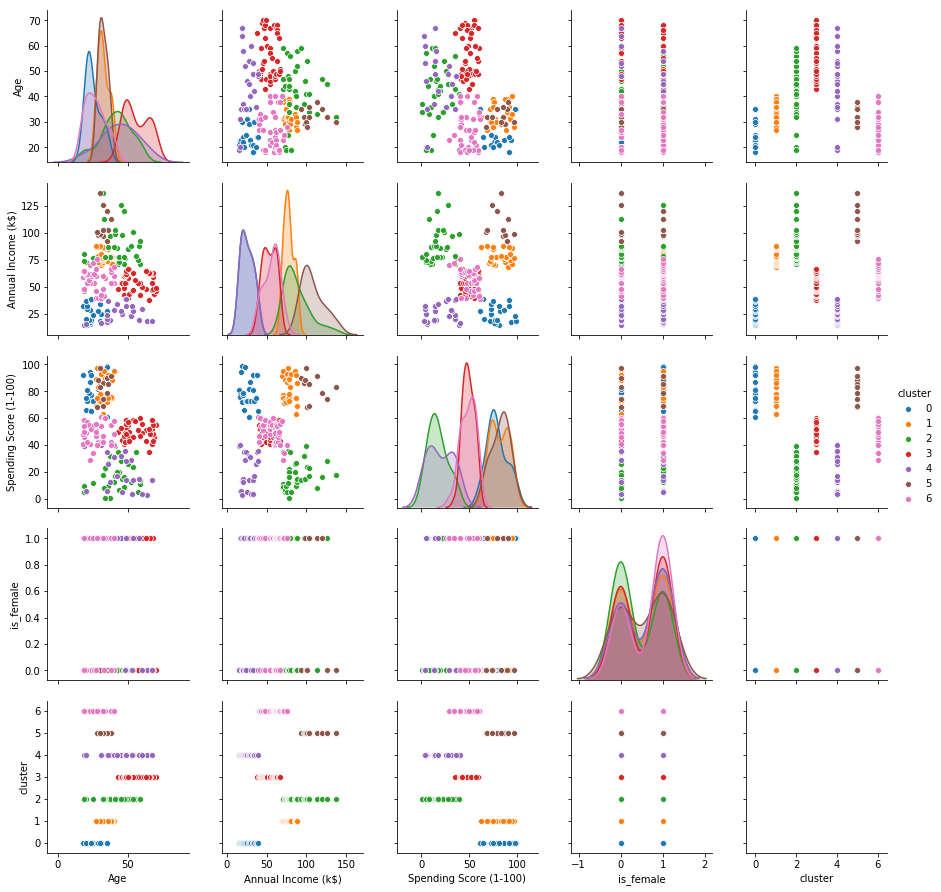

In [18]:
sn.pairplot(df, hue='cluster')